In [1]:
%matplotlib inline
from neurotools.nlab import *

Loading nlab namespace
<function decorator at 0x7fe805111510>


# Rectangular coordinates test

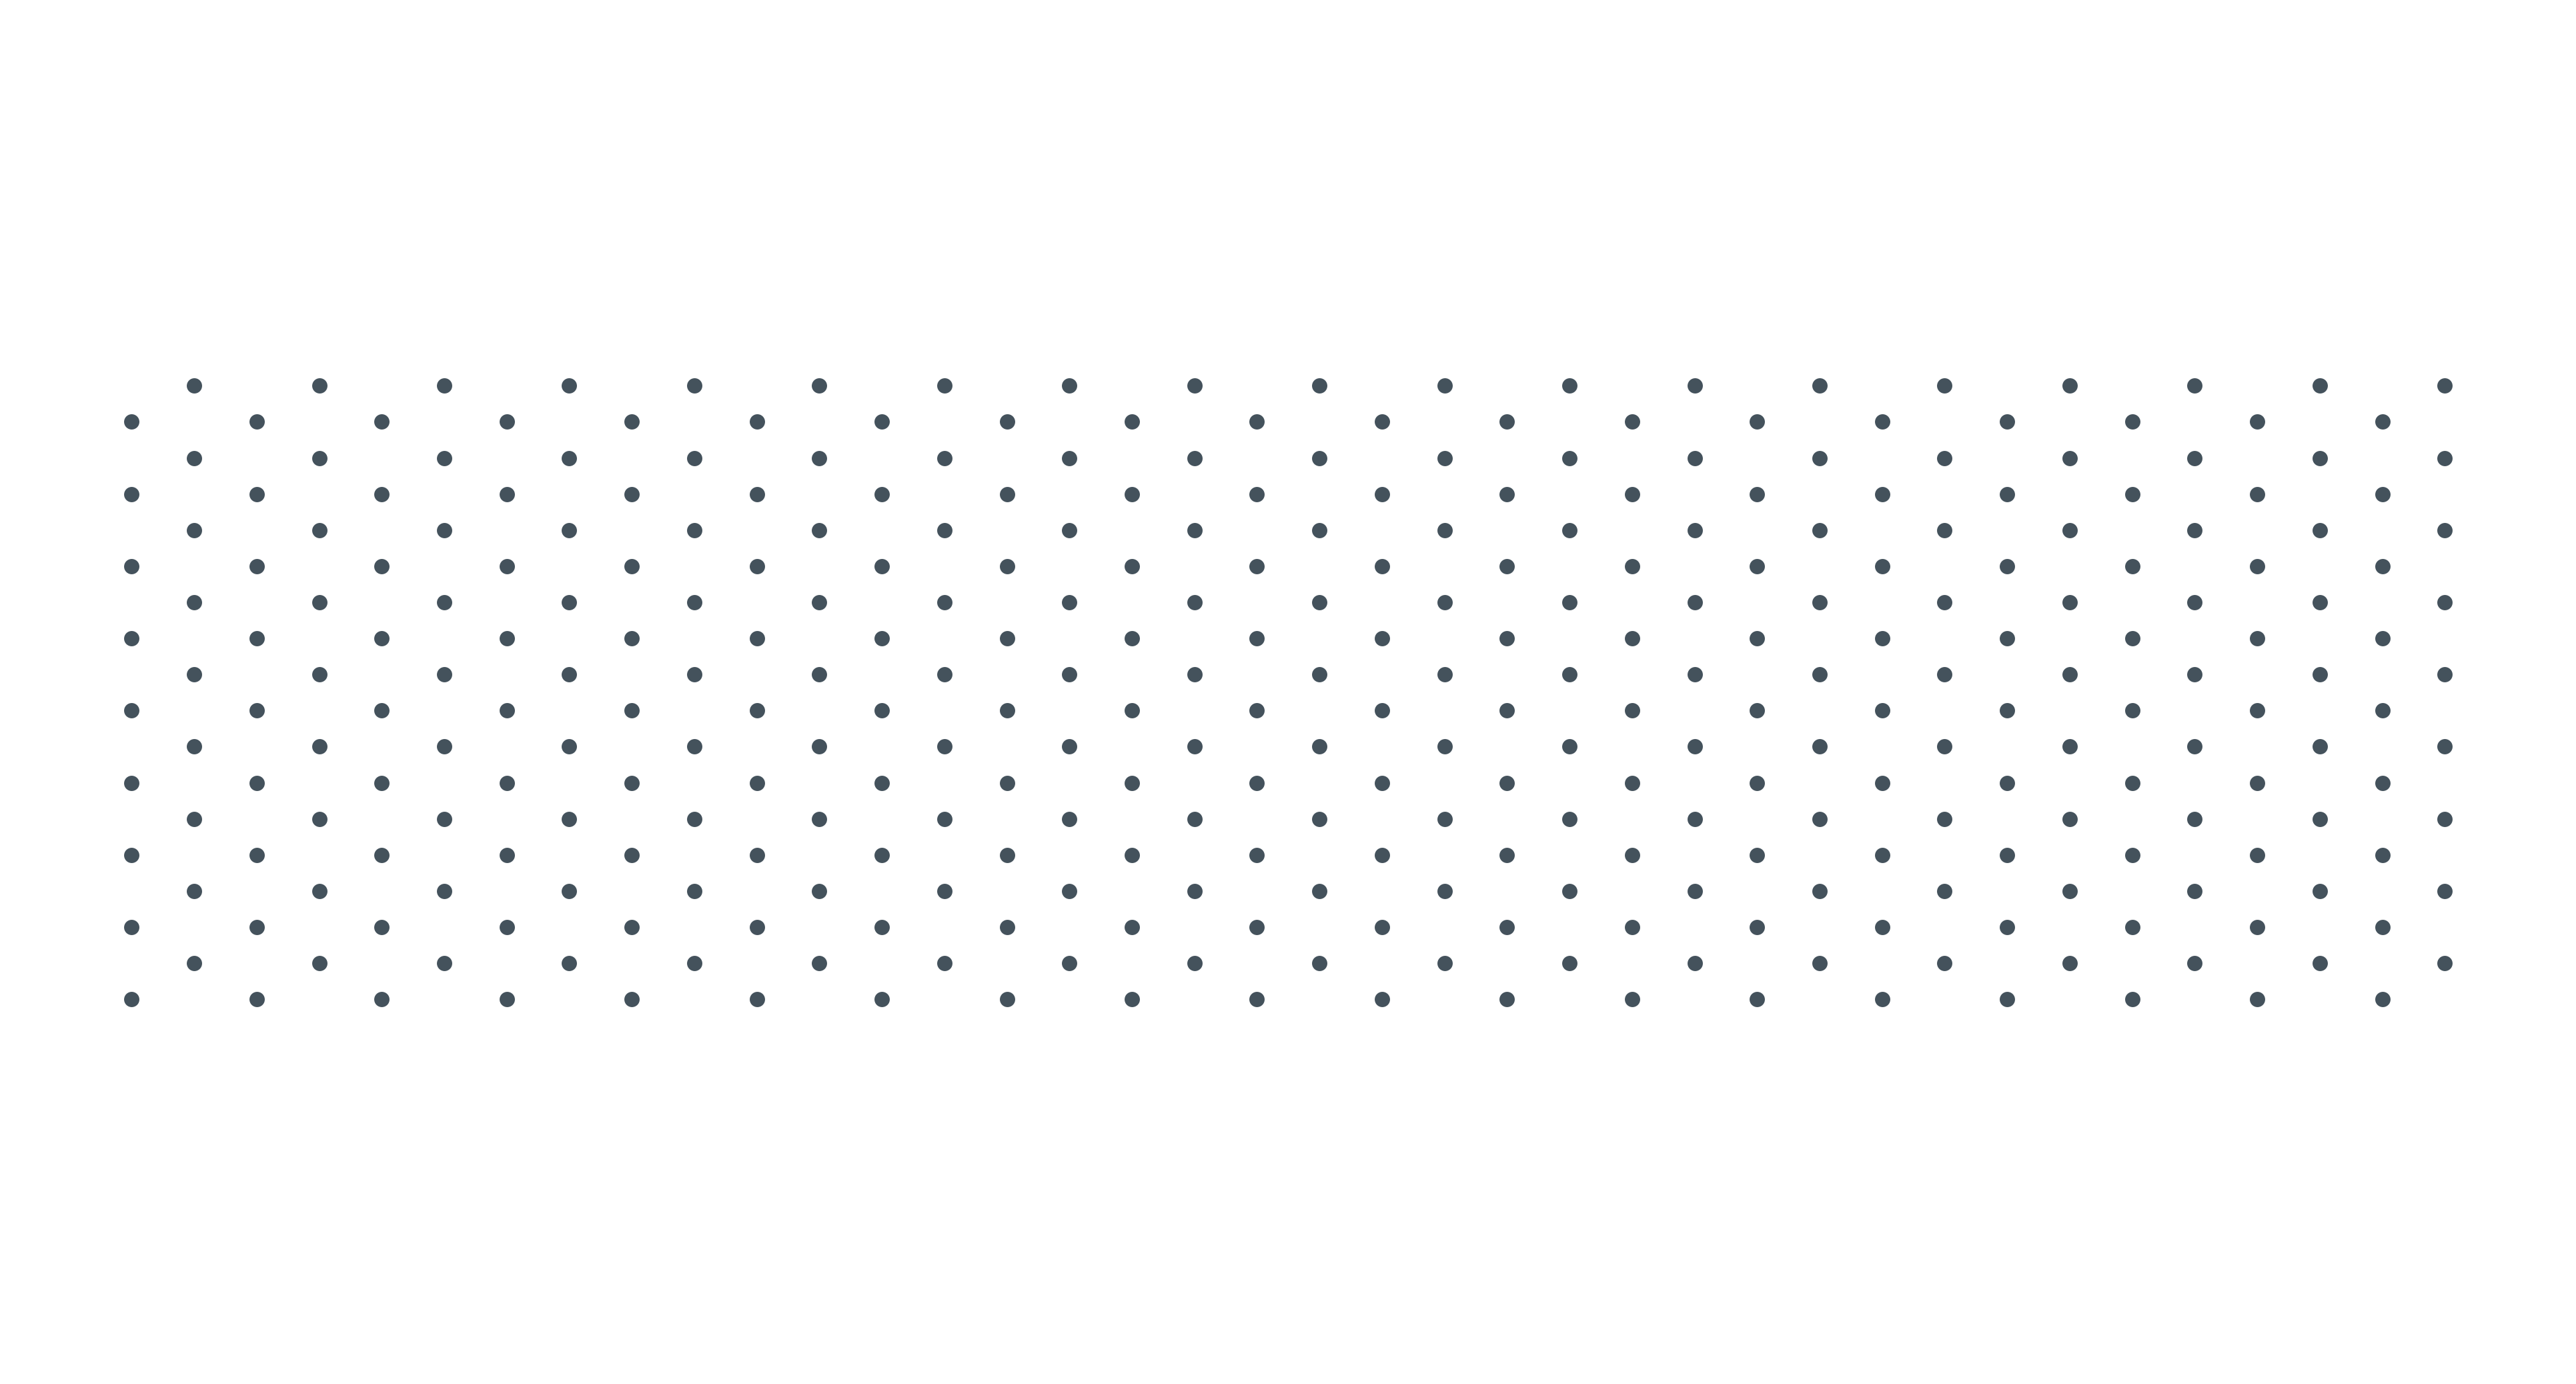

In [2]:
N = 19
M = N*(N-1)
cols = N-1
rows = N

figure(figsize=(rows*sqrt(3),cols),dpi=150)

for c in range(cols):
    x = arange(rows)*sqrt(3) + (sqrt(3)*0.5)*(c%2)
    y = ones(rows)*c*0.5
    scatter(x,y,s=100,color=BLACK)
    
axis('equal')
noxyaxes()

# Polar coordinate transformations

In [3]:
# Golden ratio
phi = (sqrt(5)-1)/2
print(phi)

0.6180339887498949


# Figure illustration

0.9980250337426722


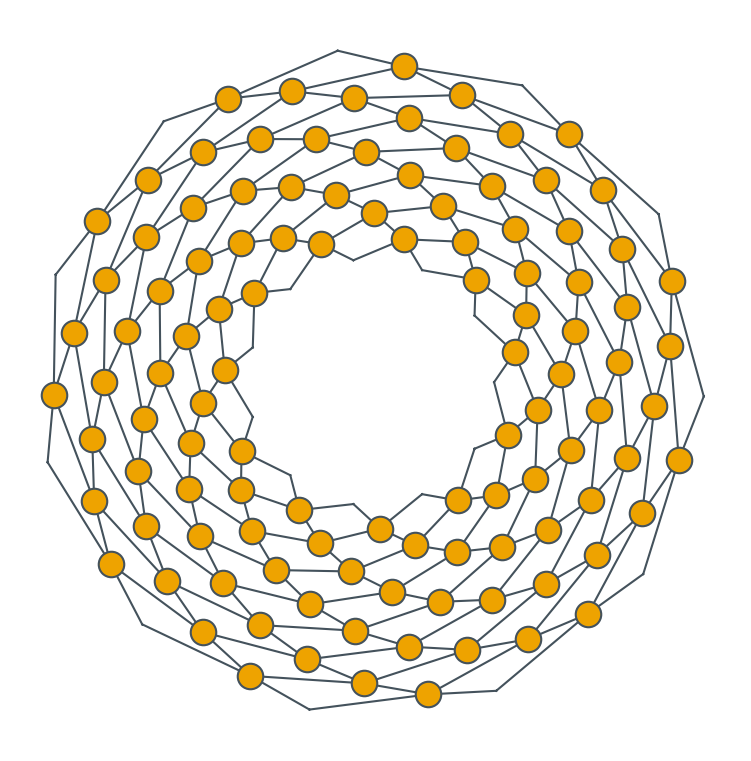

In [4]:
A4mm = array([210,297])
mmperinch = 25.4
size_in = A4mm/mmperinch
marginmm = 5
marginin = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
pagecenter = axissizecm/2
scale = 13


N = 11
M = N*(N-1)
cols = N-1+2
rows = N

vertices= []
edges   = []

for c in range(cols):
    x = arange(rows)*sqrt(3)# + (sqrt(3)*0.5)*(c%2)
    x += c*phi
    y = ones(rows)*c*0.5
    # polar transform
    theta = x/(rows*sqrt(3))*2*pi
    r     = y/cols*2
    # Adjustment
    x,y = c2p(log(1+r*0.8+0.3)*exp(1j*theta))
    vv = array(list(zip(x,y)))
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)*scale + pagecenter
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path).T
linecolor=BLACK



figure(figsize=(5,5),dpi=150)
mx,my = marginfraction
subplots_adjust(mx,my,1-mx,1-my,0,0)

plot(*path.T[rows*3*2:-rows*3*2].T,lw=1,color=linecolor)
plot(*path.T[:rows*3*2].T,lw=1,color =linecolor)
plot(*path.T[-rows*3*2:].T,lw=1,color=linecolor)
size = 150
facecolor=OCHRE
edgecolor=BLACK
scatter(*vertices[rows:-rows].T,color=BLACK,zorder=10,s=size,facecolor=facecolor,edgecolor=edgecolor)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])

noxyaxes()
axis('equal')
savefigure('Sunflower_illustration')

# If using 9mm beads, probably want at least 9+3=12 mm length at minimum
# Could use 6mm+3mm = 9mm minimum if have 6mm beads
lens = abs(p2c(diff((vertices)[edges],axis=1).squeeze().T))
print(np.min(lens))

# Cylindrical coordinates

1.022458688411772


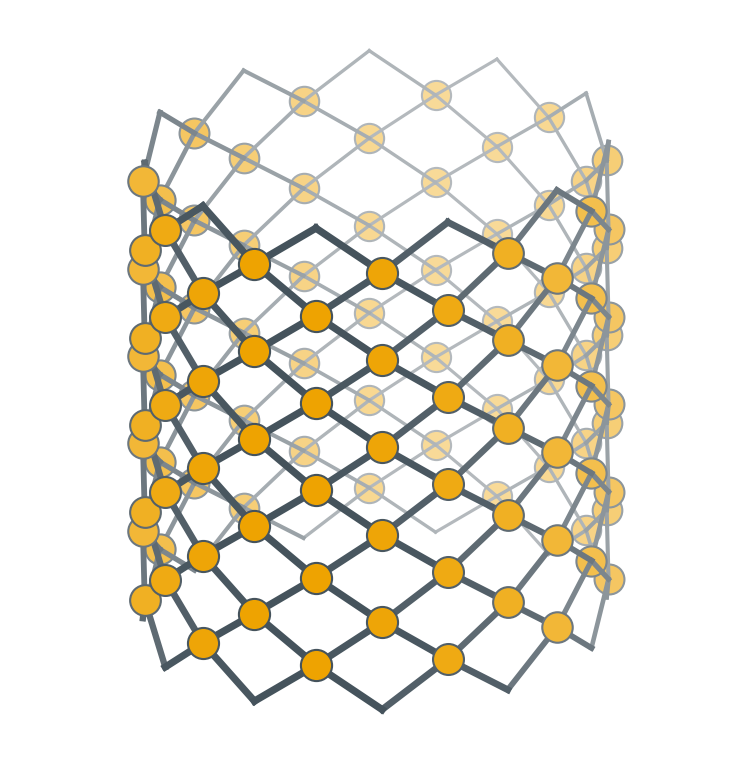

In [5]:
A4mm = array([210,297])
mmperinch = 25.4
size_in = A4mm/mmperinch
marginmm = 5
marginin = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
pagecenter = axissizecm/2
scale = 13


N = 11
M = N*(N-1)
cols = N-1+2
rows = N

vertices= []
edges   = []

projection = array([
    [0.92,0.39,0],
    [.3*-.39,0.4*.91,sqrt(5)],
    [0,-1,0],
])

figure(figsize=(5,5),dpi=150)
mx,my = marginfraction
subplots_adjust(mx,my,1-mx,1-my,0,0)

for c in range(cols):
    x = arange(rows)*sqrt(3) + (sqrt(3)*0.5)*(c%2)
    #x += c*phi
    y = ones(rows)*c*0.5
    # polar transform
    #theta = x/(rows*sqrt(3))*2*pi
    #r     = y/cols*2
    # Adjustment
    #x,y = c2p(log(1+r*0.8+0.3)*exp(1j*theta))
    # Cylindrical
    R = 1
    theta = x/(rows*sqrt(3))*2*pi
    z = y/cols*2
    # Convert to 3D x y z
    x,y = c2p(R*exp(1j*theta))
    # Project
    x,y,z = projection@[x,y,z]
    vv = array(list(zip(x,y)))
    XYZ = array(list(zip(x,y,z)))
    if c>0 and c<N:
        for x,y,z in XYZ:
            x,y = array([x,y])*scale + pagecenter
            fade = (((z+1)*0.5)*0.6+0.4)
            scatter([x],[y],
                    s=70*(z*0.2+3),
                    facecolor=1-(1-OCHRE)*fade,
                    zorder=z*100,
                    edgecolor=1-(1-BLACK)*fade)
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-(c%2)*2+1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)
        # Plot it
        for e1,e2 in ee:
            v1 = XYZ[e2-vi0]
            v2 = vertices[e1]
            x1,y1,z = v1
            x2,y2 = v2
            
            x1,y1 = array([x1,y1])*scale + pagecenter
            x2,y2 = array([x2,y2])*scale + pagecenter
            fade = (((z+1)*0.5)*0.6+0.4)
            plot([x1,x2],[y1,y2],
                 lw=(z+2.5),
                 zorder=z*50,
                 color=1-(1-BLACK)*fade)
            

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)*scale + pagecenter
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path).T
linecolor=BLACK

#plot(*path.T[rows*3*2:-rows*3*2].T,lw=1,color=linecolor)
#plot(*path.T[:rows*3*2].T,lw=1,color =linecolor)
#plot(*path.T[-rows*3*2:].T,lw=1,color=linecolor)
size = 50
facecolor=OCHRE
edgecolor=BLACK
#scatter(*vertices[rows:-rows].T,color=BLACK,zorder=10,s=size,facecolor=facecolor,edgecolor=edgecolor)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])

noxyaxes()
axis('equal')
savefigure('Sunflower_illustration_cylinder')

# If using 9mm beads, probably want at least 9+3=12 mm length at minimum
# Could use 6mm+3mm = 9mm minimum if have 6mm beads
lens = abs(p2c(diff((vertices)[edges],axis=1).squeeze().T))
print(np.min(lens))